# Python with matplotlib and seaborn

In [2]:
import pandas as pd

nepal_population_distribution = pd.read_csv("./data/nepal-population-distribution.csv")
print(nepal_population_distribution.head())

gender = nepal_population_distribution["Sex"]
male = nepal_population_distribution[nepal_population_distribution["Sex"] == "M"]
female = nepal_population_distribution[nepal_population_distribution["Sex"] == "F"]
year = nepal_population_distribution["Year"]

   Year Sex  0-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  ...  55-59  \
0  1990   M  8.2  7.0    6.1    5.2    4.5    3.8    3.2    2.9  ...    1.3   
1  1990   F  7.9  6.7    5.8    4.9    4.2    3.6    3.1    2.7  ...    1.3   
2  2020   M  5.1  5.1    5.2    5.5    5.0    3.8    2.8    2.6  ...    1.7   
3  2020   F  4.9  4.9    5.0    5.5    5.5    5.0    4.2    3.5  ...    1.8   
4  2030   M  4.4  4.6    4.5    4.4    4.4    4.7    4.3    3.3  ...    1.8   

   60-64  65-69  70-74  75-79  80-84  85-89  90-94  95-99  100+  
0    1.0    0.7    0.5    0.3    0.1    0.0    0.0      0     0  
1    1.1    0.8    0.6    0.3    0.2    0.0    0.0      0     0  
2    1.4    1.2    0.8    0.5    0.2    0.1    0.0      0     0  
3    1.5    1.3    0.9    0.6    0.3    0.1    0.0      0     0  
4    1.5    1.2    0.9    0.6    0.3    0.1    0.0      0     0  

[5 rows x 23 columns]


### Line Plot

To compare the population distribution across age groups for males and female in each year:


   Year Sex  0-4  5-9  10-14  15-19  20-24  25-29  30-34  35-39  ...  55-59  \
0  1990   M  8.2  7.0    6.1    5.2    4.5    3.8    3.2    2.9  ...    1.3   

   60-64  65-69  70-74  75-79  80-84  85-89  90-94  95-99  100+  
0    1.0    0.7    0.5    0.3    0.1    0.0    0.0      0     0  

[1 rows x 23 columns]


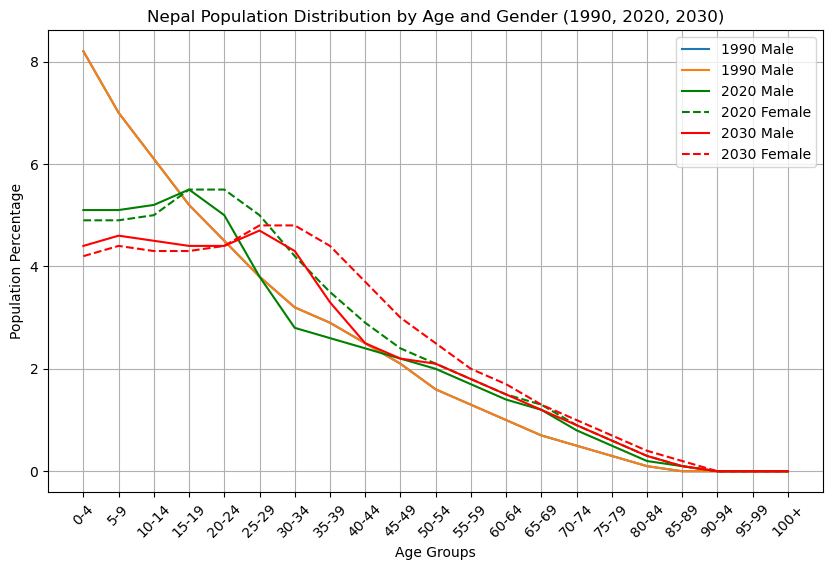

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

#  Age group columns
age_groups = nepal_population_distribution.columns[2:] # Excludes "Year" and "Sex" columns

# Filtering data for each year and gender
data_1990_male = nepal_population_distribution[(nepal_population_distribution["Year"] == 1990) & (nepal_population_distribution["Sex"] == "M")]
data_1990_female = nepal_population_distribution[(nepal_population_distribution["Year"] == 1990) & (nepal_population_distribution["Sex"] == "F")]
data_2020_male = nepal_population_distribution[(nepal_population_distribution["Year"] == 2020) & (nepal_population_distribution["Sex"] == "M")]
data_2020_female = nepal_population_distribution[(nepal_population_distribution["Year"] == 2020) & (nepal_population_distribution["Sex"] == "F")]
data_2030_male = nepal_population_distribution[(nepal_population_distribution["Year"] == 2030) & (nepal_population_distribution["Sex"] == "M")]
data_2030_female = nepal_population_distribution[(nepal_population_distribution["Year"] == 2030) & (nepal_population_distribution["Sex"] == "F")]

print(data_1990_male)

# Plot the data
plt.figure(figsize=(10, 6))

# Plot for 1990
plt.plot(age_groups, data_1990_male.values[0][2:], label="1990 Male", linestyle="-")
plt.plot(age_groups, data_1990_male.values[0][2:], label="1990 Male", linestyle="-")

# Plot for 2020
plt.plot(age_groups, data_2020_male.values[0][2:], label="2020 Male", color="green", linestyle="-")
plt.plot(age_groups, data_2020_female.values[0][2:], label="2020 Female", color="green", linestyle="--")

# Plot for 2030
plt.plot(age_groups, data_2030_male.values[0][2:], label="2030 Male", color="red", linestyle="-")
plt.plot(age_groups, data_2030_female.values[0][2:], label="2030 Female", color="red", linestyle="--")

# Customizing the plot
plt.xlabel("Age Groups")
plt.ylabel("Population Percentage")
plt.title("Nepal Population Distribution by Age and Gender (1990, 2020, 2030)")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

# Show the plot
plt.show()

### Scatter Plot

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


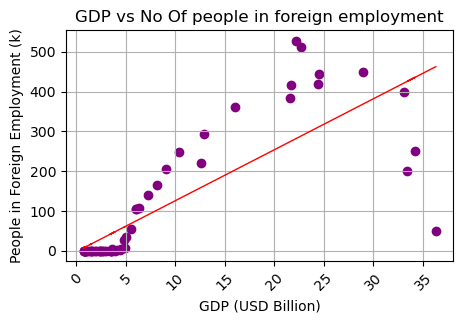

In [4]:
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Creating the scatter plot
nepal_economy = pd.read_csv("data/nepal-economy.csv")
nepal_economy["no_of_people_in_foreign_employment"] = nepal_economy["no_of_people_in_foreign_employment"].apply(lambda n : n /1000)

display(nepal_economy.head())

plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy["GDP"],
    nepal_economy["no_of_people_in_foreign_employment"],
    color="purple"
)

# Fit a linear regression model to the data
x = nepal_economy["GDP"]
y = nepal_economy["no_of_people_in_foreign_employment"]
m, c = np.polyfit(x, y, 1) # 1 is degree of polynomial y=mx+c is degree 1

# Plot the trend line
plt.plot(x, m * x + c, color="red", linewidth=1, label="GDP=FE-Trend-Line")

# Add titles and labels
plt.xticks(rotation=45)
plt.title("GDP vs No Of people in foreign employment")
plt.xlabel("GDP (USD Billion)")
plt.ylabel("People in Foreign Employment (k)")
plt.grid("True")

# Display the plot
plt.show()

### Bubbleplot

,Year,GDP,per_capita,Growth,trade_balance_usd_billon,contribution_of_manufacturing_industry_to_gdp,no_of_people_in_foreign_employment
0,1965,0.735267,67.0075,-1.2032,-0.045282,3.284541,0.0
1,1966,0.906812,81.1644,7.0406,-0.028219,3.430308,0.0
2,1967,0.841974,73.9679,-1.5715,-0.000656,3.413874,0.0
3,1968,0.772229,66.5489,0.6755,-0.005060,3.568939,0.0
4,1969,0.788642,66.6383,4.4634,-0.025284,3.844709,0.0


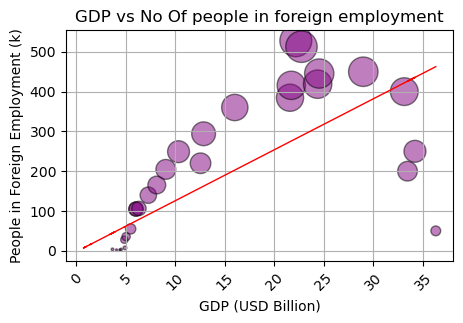

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np

# Creating the scatter plot
nepal_economy = pd.read_csv("data/nepal-economy.csv")
nepal_economy["no_of_people_in_foreign_employment"] = nepal_economy["no_of_people_in_foreign_employment"].apply(lambda n : n /1000)

display(nepal_economy.head())

plt.figure(figsize=(5, 3))
plt.scatter(
    nepal_economy["GDP"],
    nepal_economy["no_of_people_in_foreign_employment"],
    s=nepal_economy["no_of_people_in_foreign_employment"],
    color="purple",
    alpha=0.5,            # Make bubbles partially transparent
    edgecolor="black"
)

# Fit a linear regression model to the data
x = nepal_economy["GDP"]
y = nepal_economy["no_of_people_in_foreign_employment"]
m, c = np.polyfit(x, y, 1) # 1 is degree of polynomial y=mx+c is degree 1

# Plot the trend line
plt.plot(x, m * x + c, color="red", linewidth=1, label="GDP=FE-Trend-Line")

# Add titles and labels
plt.xticks(rotation=45)
plt.title("GDP vs No Of people in foreign employment")
plt.xlabel("GDP (USD Billion)")
plt.ylabel("People in Foreign Employment (k)")
plt.grid("True")

# Display the plot
plt.show()

### Heatmap

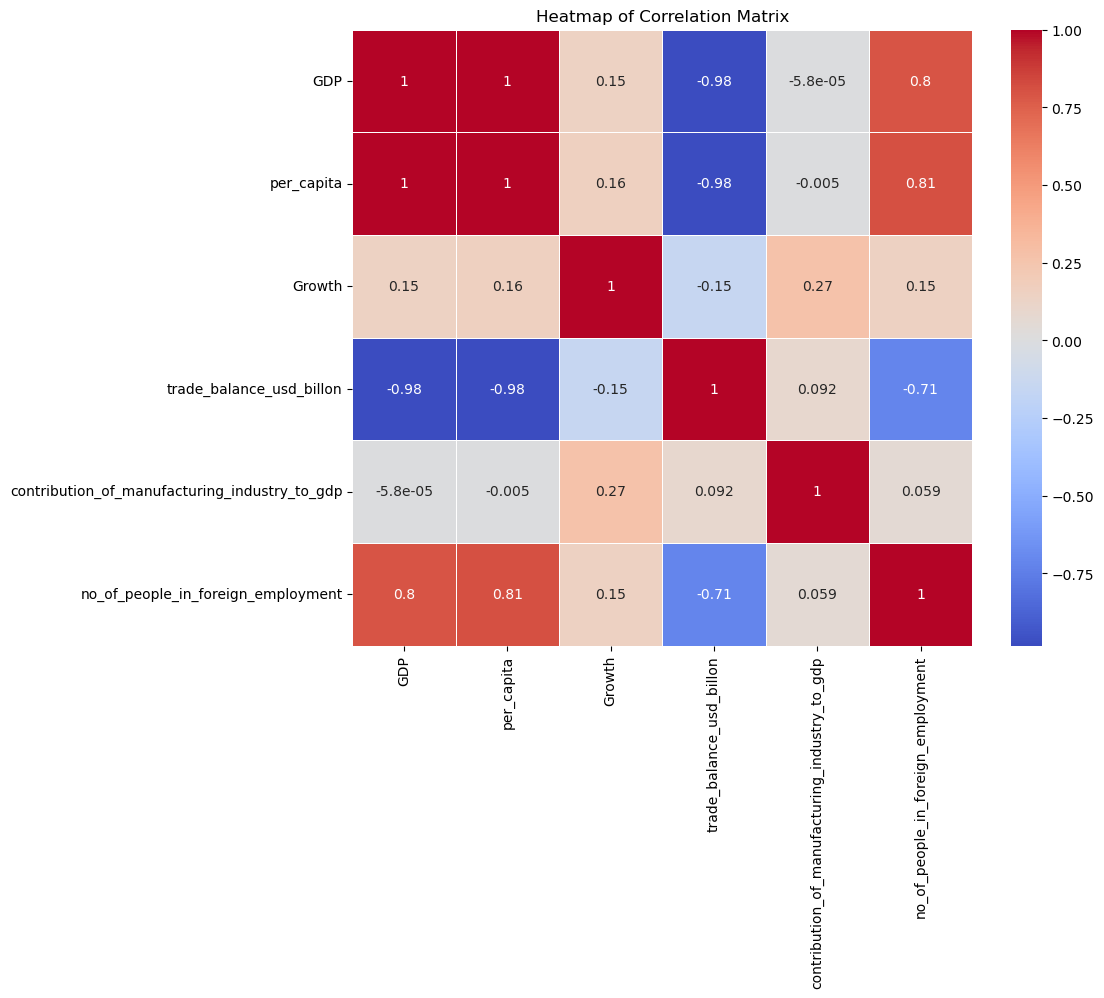

In [6]:
import seaborn as sns

plt.figure(figsize=(10, 8))
correlation_matrix = nepal_economy.drop(columns=["Year"], inplace=False).corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap of Correlation Matrix")
plt.show()

### Histogram

- Histogram
- cumulative Frequency distribution
- 

The students midpoints are 0    10.0
1    30.0
2    50.0
3    70.0
4    90.0
Name: mid-points, dtype: float64


'The lower bound is'

0

'The upper bound is'

100

'The calculated bin-edges are'

[0, 20, 40, 60, 80, 100]

,Marks,no_of_students,mid-points,bins
0,0-20,10,10.0,"(0, 20]"
1,20-40,22,30.0,"(20, 40]"
2,40-60,35,50.0,"(20, 40]"
3,60-80,28,70.0,"(20, 40]"
4,80-100,5,90.0,"(0, 20]"


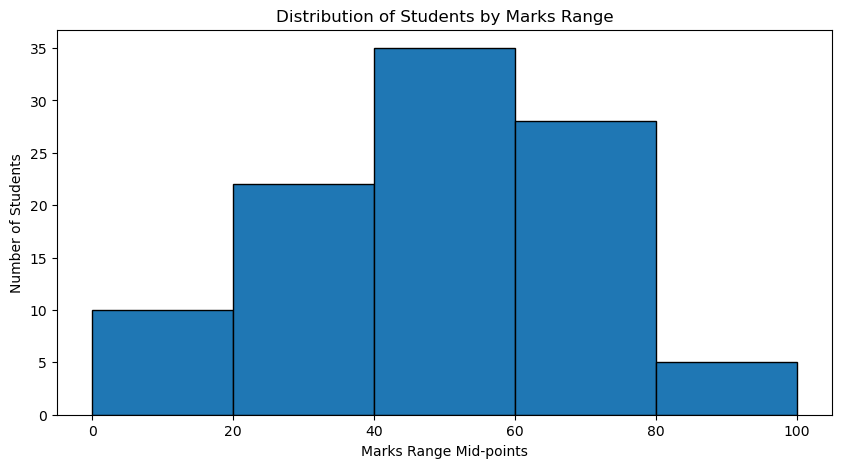

In [7]:
students_data = pd.DataFrame( {
    "Marks": ["0-20", "20-40", "40-60", "60-80", "80-100"],
    "no_of_students":[10,22,35,28,5]
})

students_data["mid-points"] = students_data["Marks"].apply(lambda m: ( int( m.split("-")[0]) + int( m.split("-")[1] ) ) /2)
lower_bounds = students_data["Marks"].apply(lambda m: int (m.split("-")[0] ) ).min()
upper_bounds = students_data["Marks"].apply(lambda m: int (m.split("-")[1] ) ).max()
print("The students midpoints are", students_data["mid-points"])
display("The lower bound is", lower_bounds)
display("The upper bound is", upper_bounds)

bin_edges = list(range(lower_bounds, upper_bounds + 1, 20))
display("The calculated bin-edges are", bin_edges)

students_data["bins"] = pd.cut(x=students_data["no_of_students"], bins=bin_edges)
display(students_data.head())

plt.figure(figsize=(10, 5))

# using the mid-points as the x-values for the histogram and the frequency y-values
plt.hist(
    students_data["mid-points"],
    bins=[0, 20, 40, 60, 80, 100],
    weights=students_data["no_of_students"],
    edgecolor="black"
)

# Adding the labels and title
plt.xlabel("Marks Range Mid-points")
plt.ylabel("Number of Students")
plt.title("Distribution of Students by Marks Range")

# Display the histograms
plt.show()

### Create a frequency curve and cumulative frequency curve on the above data

,Marks,no_of_students,mid-points,bins
0,0-20,10,10.0,"(0, 20]"
1,20-40,22,30.0,"(20, 40]"
2,40-60,35,50.0,"(20, 40]"
3,60-80,28,70.0,"(20, 40]"
4,80-100,5,90.0,"(0, 20]"


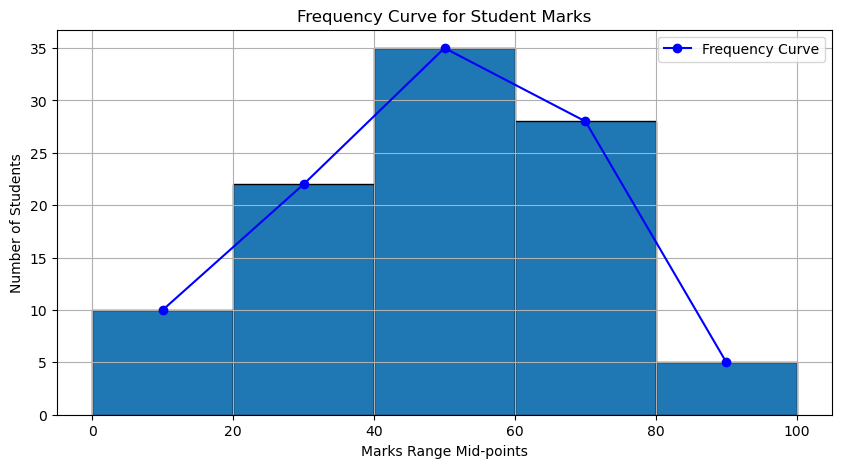

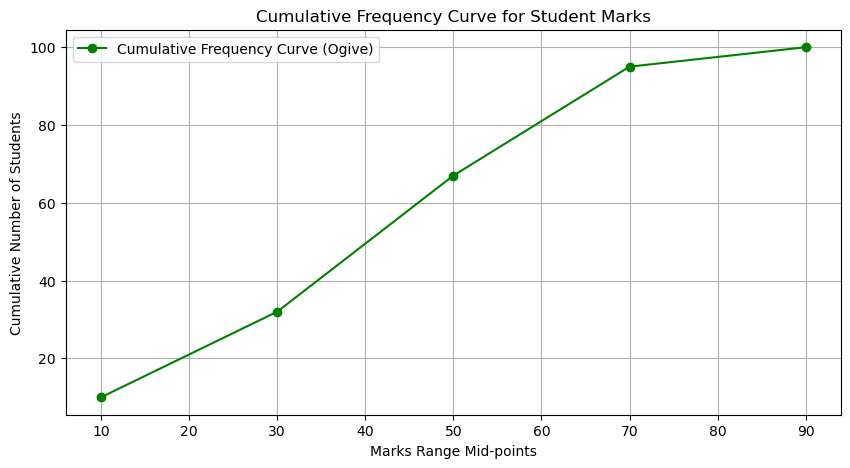

In [8]:
display(students_data)

# Calculating cumulative frequency curve
students_data["cumulative_frequency"] = students_data["no_of_students"].cumsum()

plt.figure(figsize=(10, 5))

plt.hist(
    students_data["mid-points"],
    bins=[0, 20, 40, 60, 80, 100],
    weights=students_data["no_of_students"],
    edgecolor="black"
)
plt.plot(
    students_data["mid-points"], 
    students_data["no_of_students"], 
    marker="o", 
    color="blue", 
    label="Frequency Curve"
)
plt.xlabel("Marks Range Mid-points")
plt.ylabel("Number of Students")
plt.title("Frequency Curve for Student Marks")
plt.grid(True)
plt.legend()
plt.show()

# Plot the Cumulative Frequency Curve (Ogive)
plt.figure(figsize=(10, 5))
plt.plot(
    students_data["mid-points"], 
    students_data["cumulative_frequency"], 
    marker="o", 
    color="green", 
    label="Cumulative Frequency Curve (Ogive)"
)
plt.xlabel("Marks Range Mid-points")
plt.ylabel("Cumulative Number of Students")
plt.title("Cumulative Frequency Curve for Student Marks")
plt.grid(True)
plt.legend()
plt.show()

### Pie-chart

- Pie Chart
- Stacked Bar Graph

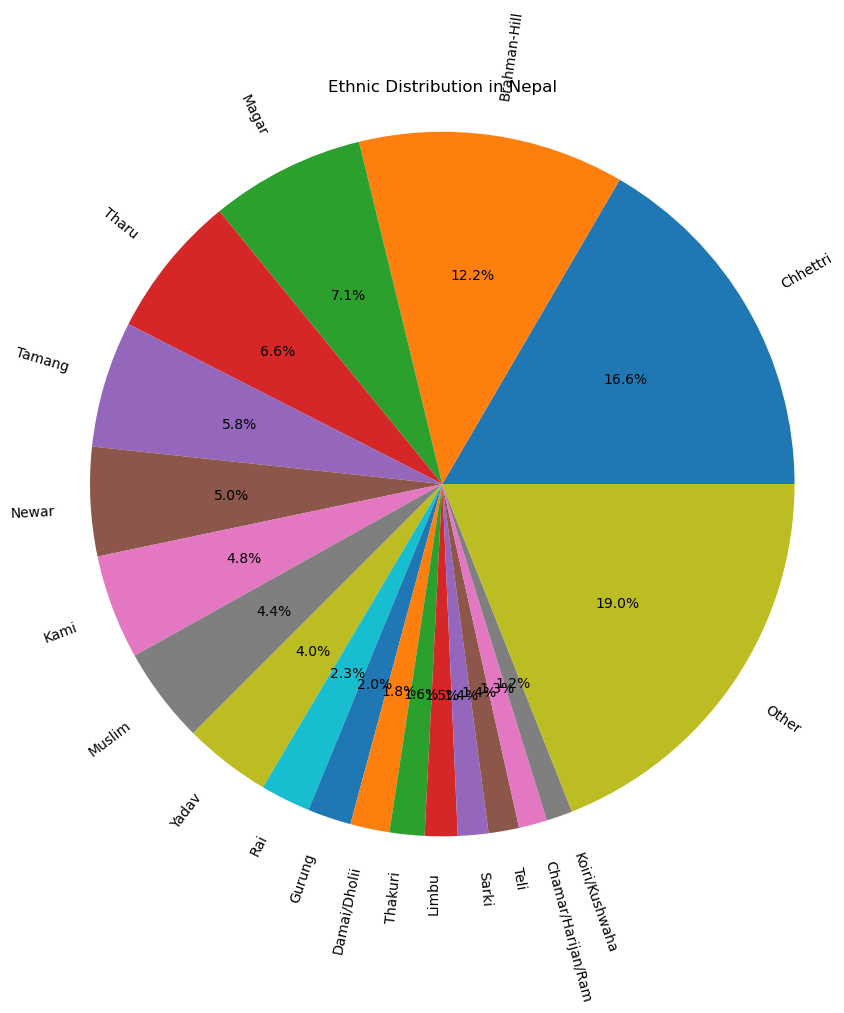

In [9]:
import json
import pandas as pd
import matplotlib.pyplot as plt

with open('data/nepal-population-ethinic-group.json', 'r') as file:
    ethnic_dist = json.load(file)

# Data Preparation
labels = ethnic_dist.keys()
sizes = ethnic_dist.values()

# Create a pie chart
plt.figure(figsize=(10, 10))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", startangle=0, rotatelabels=45)
plt.title("Ethnic Distribution in Nepal")

plt.axis("equal")

# Display the pie chart
plt.show()

### Stacked Bar Graph (Homework)

so, if i want to create a stacked bar graph then it involves section in the same bar which represents its value. For instance, if i score 500 marks in 600 where 98 is in math, 89 in english and so on. There will be separate portion for it.

Data successfully written to data/marks_obtained.json
{'Rishav': {'English': 85, 'Math': 90}, 'Anjali': {'English': 78, 'Math': 82}, 'Samir': {'English': 92, 'Math': 88}, 'Priya': {'English': 89, 'Math': 95}, 'Kiran': {'English': 76, 'Math': 84}}


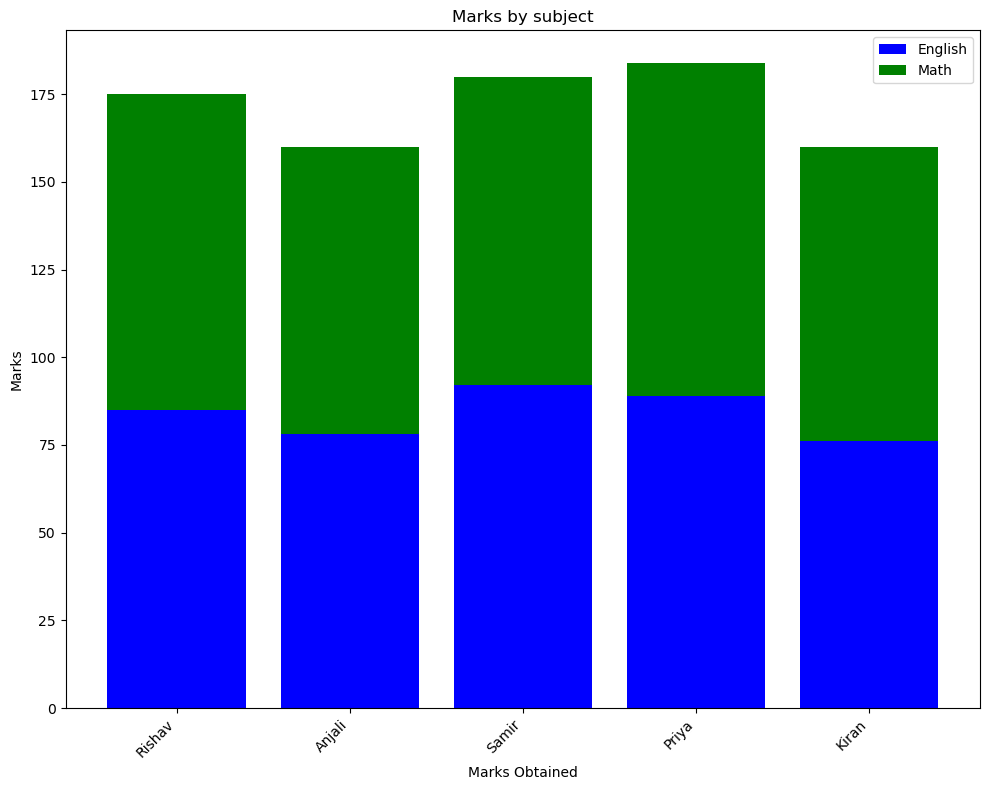

In [19]:
import json
import matplotlib.pyplot as plt
import pandas as pd


# Define the ethnic distribution data
# ethnic_distribution = {
#     "Newar": {"male": 3000, "female": 3200},
#     "Tharu": {"male": 2500, "female": 2700},
#     "Chettri": {"male": 4000, "female": 3800},
#     "Brahmin": {"male": 1500, "female": 1600},
#     "Tamang": {"male": 2000, "female": 2100}
# }

marks_obtained = {
    "Rishav": {"English": 85, "Math": 90},
    "Anjali": {"English": 78, "Math": 82},
    "Samir": {"English": 92, "Math": 88},
    "Priya": {"English": 89, "Math": 95},
    "Kiran": {"English": 76, "Math": 84}
}


# # Specify the file name
file_name = 'data/marks_obtained.json'

# # Write the data to a JSON file
with open(file_name, 'w') as json_file:
    json.dump(marks_obtained, json_file, indent=4)

print(f"Data successfully written to {file_name}")

# Load the ethnic distribution data
with open('data/marks_obtained.json', 'r') as file:
    marks_obtained_json_load = json.load(file)

print(marks_obtained_json_load)

# Data Preparation
# Extracting datas
labels = list(marks_obtained_json_load.keys())
english_score = [marks_obtained_json_load[group]['English'] for group in labels]
math_score = [marks_obtained_json_load[group]['Math'] for group in labels]

# Create a DataFrame for better handling
data = pd.DataFrame({
    'Marks Obtained': labels,
    'English Score': english_score,
    'Math Score': math_score
})

# Create the stacked bar graph
plt.figure(figsize=(10, 8))

# Plotting the stacked bar graph
plt.bar(data['Marks Obtained'], data['English Score'], color='blue', label='English')
plt.bar(data['Marks Obtained'], data['Math Score'], bottom=data['English Score'], color='green', label='Math')

# Add labels and title
plt.xlabel('Marks Obtained')
plt.ylabel('Marks')
plt.title('Marks by subject')
plt.xticks(rotation=45, ha='right')
plt.legend()
plt.tight_layout()

# Show the plot
plt.show()

### Introduction to Numpy

#### NumPy Array Creation

In [ ]:
import numpy as np

np_array = np.array([1, 2, 3, 4, 5, 6]) # from list
print(np_array)

np_array_tuple = np.array((1, 2, 3, 4, 5)) # from tuple

print(np_array_tuple)
print(type(np_array))
print(np_array.dtype)

[1 2 3 4 5 6]
[1 2 3 4 5]
<class 'numpy.ndarray'>
int64


#### Create array with default values
- create an array filled with zeros '''np.zeroes( (2,2))'''
- create an array filled with ones ''np.ones((2,2))''
- create an array filled with specific values ''np.full((2,2),5)''

In [ ]:
zeroes_array = np.zeros((2, 2)) # Createa (n=2, m=2) array filled with zeros
print(zeroes_array)
ones_array = np.ones((2, 2))
print(ones_array)
five_array = np.full((2, 2),5)
print(five_array)

[[0. 0.]
 [0. 0.]]
[[1. 1.]
 [1. 1.]]
[[5 5]
 [5 5]]


### Creating Arrays with Ranges of Values



In [ ]:
np_arrange = np.arange(0,25,1) # Similar to range function
print(np_arrange)

np_line_space = np.linspace(0,100, 6) # Creating evenly spaced 6 points from 0-100
print(np_line_space)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24]
[  0.  20.  40.  60.  80. 100.]


#### Identify, Diagonal matrices

- np.eye(3,3)
- np.diag([1,2,3])

identity matrix determinant is always 1

In [ ]:
identical_array = np.eye(3,3) # identify array
print(identical_array)

diagonal_array = np.diag([1,2,3]) # Diagnonal Array
print(diagonal_array)



[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[1 0 0]
 [0 2 0]
 [0 0 3]]


#### Random 

np.random.normal(mu, sigma, 10000) = creation of random array of elements 100 with mu = population mean and sigma= population standard deviation

[[0.10013102 0.15129589 0.89496643]
 [0.92060336 0.24116312 0.75231357]
 [0.54687853 0.78785967 0.08690467]]
[[21 23 83]
 [78 47  6]
 [55  4 83]]
[[3 5 2]
 [5 2 3]
 [3 4 4]]


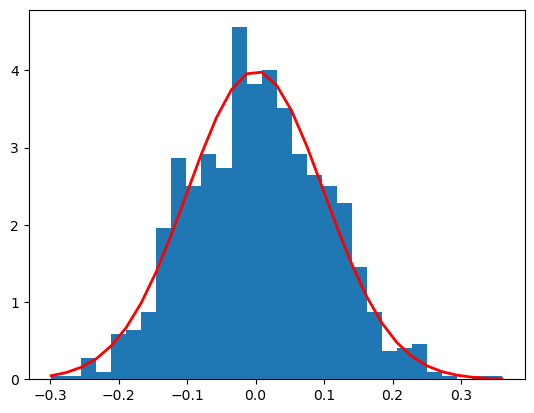

In [ ]:
import matplotlib.pyplot as plt

random_array = np.random.rand(3,3)
print(random_array)

rand_in_betn = np.random.randint(1,100,(3,3))
print(rand_in_betn)

rand_choice = np.random.choice([1,2,3,4,5,9,10], size=(3,3))
print(rand_choice)

# Drawing histogram from normal distribution
mu, sigma = 0, 0.1 # mean and standard deviation
rand_array_normal_distro = np.random.normal(mu,sigma,1000) # normal distribution
count, bins, ignored = plt.hist(rand_array_normal_distro, 30, density=True)
plt.plot(bins, 1/(sigma * np.sqrt(2 * np.pi)) * np.exp( - (bins - mu) ** 2 / (2 *sigma **2) ), linewidth=2, color="r")
plt.show()